### Data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('mental_health.csv')
df.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [3]:
df.describe()

,label
count,27977.000000
mean,0.494621
std,0.499980
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27977 non-null  object
 1   label   27977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.3+ KB


### Preprocessing

In [5]:
df['length'] = df['text'].apply(len)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27977 non-null  object
 1   label   27977 non-null  int64 
 2   length  27977 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 655.8+ KB


In [7]:
df.head()

,text,label,length
0,dear american teens question dutch person hear...,0,135
1,nothing look forward lifei dont many reasons k...,1,117
2,music recommendations im looking expand playli...,0,450
3,im done trying feel betterthe reason im still ...,1,594
4,worried year old girl subject domestic physic...,1,2133


<Axes: xlabel='length', ylabel='Count'>

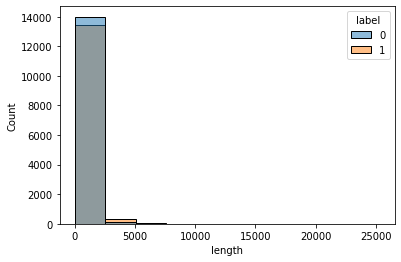

In [8]:
sns.histplot(df, x = 'length', bins = 10, hue = 'label')

<Axes: >

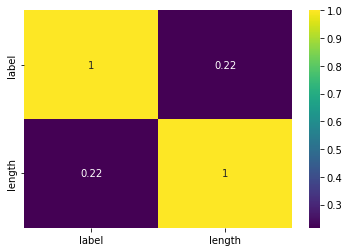

In [9]:
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

In [10]:
df['length'].max()

25289

In [11]:
df['length'].min()

2

### Preprocessing

In [12]:
import string
from nltk.corpus import stopwords

In [13]:
stopwords_arr = stopwords.words('english')
stopwords_arr

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
punctuations = string.punctuation
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def preprocess_text(text):
    text = ''.join([ch for ch in text if ch not in punctuations])
    word_arr = text.split()
    word_arr = [word.lower() for word in word_arr if word.lower() not in stopwords_arr]
    return word_arr

In [16]:
df['text'].head(20).apply(preprocess_text)

0     [dear, american, teens, question, dutch, perso...
1     [nothing, look, forward, lifei, dont, many, re...
2     [music, recommendations, im, looking, expand, ...
3     [im, done, trying, feel, betterthe, reason, im...
4     [worried, year, old, girl, subject, domestic, ...
5     [hey, rredflag, sure, right, place, post, goes...
6     [feel, like, someone, needs, hear, tonight, fe...
7     [deserve, liveif, died, right, noone, would, c...
8     [feels, good, ive, set, dateim, killing, frida...
9     [live, guiltok, made, stupid, random, choice, ...
10    [excercise, motivated, ngl, cant, wait, get, s...
11    [know, youd, rather, laid, big, booty, body, h...
12                   [even, time, fuck, supposed, mean]
13    [usual, hollywood, stereotyped, everyone, movi...
14    [think, nearly, unbelievable, film, could, mad...
15                 [trying, rd, time, k, krma, special]
16    [guy, coming, sure, wear, f, hey, guy, friend,...
17    [one, best, episodes, entire, xfiles, seri

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [18]:
bow_transformer = CountVectorizer(analyzer = preprocess_text).fit(df['text'])

In [19]:
print(len(bow_transformer.vocabulary_))

72426


In [20]:
text_bow = bow_transformer.transform(df['text'])

In [21]:
tfdif_transformer = TfidfTransformer().fit(text_bow)

In [22]:
X = tfdif_transformer.transform(text_bow)
y = df['label']

### Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

### Testing and Evaluation

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [26]:
mental_health_classifier_NB = MultinomialNB()

In [27]:
mental_health_classifier_NB.fit(X_train, y_train)

MultinomialNB()

In [28]:
predictions = mental_health_classifier_NB.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 1, 1])

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
print(confusion_matrix(y_test, predictions))

[[3023 1180]
 [  50 4141]]


In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83      4203
           1       0.78      0.99      0.87      4191

    accuracy                           0.85      8394
   macro avg       0.88      0.85      0.85      8394
weighted avg       0.88      0.85      0.85      8394



In [32]:
mental_health_classifier_LR = LogisticRegression()

In [33]:
mental_health_classifier_LR.fit(X_train, y_train)

LogisticRegression()

In [34]:
predictions = mental_health_classifier_LR.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 1, 1])

In [35]:
print(confusion_matrix(y_test, predictions))

[[3943  260]
 [ 425 3766]]


In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4203
           1       0.94      0.90      0.92      4191

    accuracy                           0.92      8394
   macro avg       0.92      0.92      0.92      8394
weighted avg       0.92      0.92      0.92      8394

